<a href="https://colab.research.google.com/github/ariesabdillah/automate_report/blob/main/automate_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
from google.colab import files
files1 = files.upload()

Saving Sales_April_2019.csv to Sales_April_2019.csv
Saving Sales_August_2019.csv to Sales_August_2019.csv
Saving Sales_December_2019.csv to Sales_December_2019.csv
Saving Sales_February_2019.csv to Sales_February_2019.csv
Saving Sales_January_2019.csv to Sales_January_2019.csv
Saving Sales_July_2019.csv to Sales_July_2019.csv
Saving Sales_June_2019.csv to Sales_June_2019.csv
Saving Sales_March_2019.csv to Sales_March_2019.csv
Saving Sales_May_2019.csv to Sales_May_2019.csv
Saving Sales_November_2019.csv to Sales_November_2019.csv
Saving Sales_October_2019.csv to Sales_October_2019.csv
Saving Sales_September_2019.csv to Sales_September_2019.csv


In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/Sales_January_2019.csv')
df2 = pd.read_csv('/content/Sales_February_2019.csv')
df3 = pd.read_csv('/content/Sales_March_2019.csv')
df4 = pd.read_csv('/content/Sales_April_2019.csv')
df5 = pd.read_csv('/content/Sales_May_2019.csv')
df6 = pd.read_csv('/content/Sales_June_2019.csv')
df7 = pd.read_csv('/content/Sales_July_2019.csv')
df8 = pd.read_csv('/content/Sales_August_2019.csv')
df9 = pd.read_csv('/content/Sales_September_2019.csv')
df10 = pd.read_csv('/content/Sales_October_2019.csv')
df11 = pd.read_csv('/content/Sales_November_2019.csv')
df12 = pd.read_csv('/content/Sales_December_2019.csv')

# Menggabungkan Data

In [ ]:
combined_file = pd.concat([df1,df2,df3,df4,df5,df6,df6,df7,df8,df9,df10,df11,df12], ignore_index= True) 

In [ ]:
combined_file

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
200467,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
200468,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
200469,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
200470,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [ ]:
combined_file.drop(combined_file[combined_file["Quantity Ordered"] == "Quantity Ordered"].index, inplace=True)


# Membuat Kolom Total price dan Order Date

In [ ]:
combined_file["total_price"] = combined_file["Quantity Ordered"].astype(float) * combined_file["Price Each"].astype(float)

In [ ]:
combined_file["Order Date"] = pd.to_datetime(combined_file["Order Date"])

In [ ]:
combined_file.drop(combined_file[combined_file["Order Date"].isna()].index, inplace=True)

In [ ]:
combined_file

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,total_price
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99
...,...,...,...,...,...,...,...
200467,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95
200468,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68
200469,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00
200470,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99


# Groupby product dan month 

In [ ]:
sales_month = combined_file.groupby(pd.Grouper(key='Order Date', freq='M')).agg({"total_price": "sum"}).reset_index()

In [ ]:
sales_month

,Order Date,total_price
0,2019-01-31,1813586.44
1,2019-02-28,2202022.42
2,2019-03-31,2807100.38
3,2019-04-30,3390670.24
4,2019-05-31,3152606.75
5,2019-06-30,5153067.18
6,2019-07-31,2650804.14
7,2019-08-31,2244467.88
8,2019-09-30,2097560.13
9,2019-10-31,3736726.88


In [ ]:
sales_product = combined_file.groupby('Product').agg({"total_price": "sum"}).reset_index().sort_values('total_price', ascending=False).head(3)


In [ ]:
sales_product

,Product,total_price
13,Macbook Pro Laptop,8642800.00
18,iPhone,5166700.00
14,ThinkPad Laptop,4444955.55


# Visualisasi data menggunakan barchart

[Text(0, 0, '1813586.44'),
 Text(0, 0, '2202022.42'),
 Text(0, 0, '2807100.38'),
 Text(0, 0, '3390670.24')]

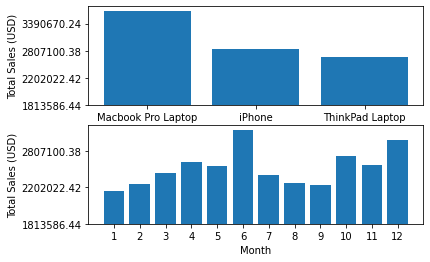

In [20]:
    fig, ax = plt.subplots(2)

    # Membuat grafik Sales by Product
    ax[0].bar(sales_product['Product'], sales_product['total_price'])
    ax[0].set_xlabel('Product')
    ax[0].set_ylabel('Total Sales (USD)')
    ax[0].set_yticklabels(sales_month['total_price'])

    # Membuat grafik Sales by Month
    ax[1].bar(sales_month['Order Date'].dt.month.astype(str), sales_month['total_price'])
    ax[1].set_xlabel('Month')
    ax[1].set_ylabel('Total Sales (USD)')
    ax[1].set_yticklabels(sales_month['total_price'])